In [130]:
import numpy as np
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt
import ta
import numpy as np
%matplotlib inline

In [131]:
df = data.DataReader(
    'BAC', 
    'yahoo',
    start = '2007/01/01',
    end = '2021/01/01'
).reset_index()

df['Date 2'] = df['Date']

df.set_index('Date', inplace=True)

df

#df['Date_Not_Index'] = df

,High,Low,Open,Close,Volume,Adj Close,Date 2
Date,,,,,,,
2007-01-03,54.180000,52.990002,53.400002,53.330002,16028200.0,40.307976,2007-01-03
2007-01-04,53.889999,53.049999,53.330002,53.669998,13175000.0,40.564949,2007-01-04
2007-01-05,53.590000,53.029999,53.590000,53.240002,10205000.0,40.239956,2007-01-05
2007-01-08,53.639999,52.799999,53.459999,53.450001,9685900.0,40.398685,2007-01-08
2007-01-09,53.709999,52.970001,53.599998,53.500000,12546500.0,40.436474,2007-01-09
...,...,...,...,...,...,...,...
2020-12-24,30.270000,29.740000,30.270000,29.959999,22632300.0,29.535604,2020-12-24
2020-12-28,30.549999,29.990000,30.230000,30.129999,32861200.0,29.703197,2020-12-28
2020-12-29,30.250000,29.930000,30.170000,30.010000,33291900.0,29.584896,2020-12-29


In [132]:
df['SMA200'] = ta.trend.sma_indicator(df.Close, window=200)
df['RSI'] = ta.momentum.rsi(df.Close, window=10)
df['Signal'] = np.where((df.Close > df.SMA200) & (df.RSI < 30), True, False)

df

,High,Low,Open,Close,Volume,Adj Close,Date 2,SMA200,RSI,Signal
Date,,,,,,,,,,
2007-01-03,54.180000,52.990002,53.400002,53.330002,16028200.0,40.307976,2007-01-03,NaN,NaN,False
2007-01-04,53.889999,53.049999,53.330002,53.669998,13175000.0,40.564949,2007-01-04,NaN,NaN,False
2007-01-05,53.590000,53.029999,53.590000,53.240002,10205000.0,40.239956,2007-01-05,NaN,NaN,False
2007-01-08,53.639999,52.799999,53.459999,53.450001,9685900.0,40.398685,2007-01-08,NaN,NaN,False
2007-01-09,53.709999,52.970001,53.599998,53.500000,12546500.0,40.436474,2007-01-09,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...
2020-12-24,30.270000,29.740000,30.270000,29.959999,22632300.0,29.535604,2020-12-24,24.76490,64.700278,False
2020-12-28,30.549999,29.990000,30.230000,30.129999,32861200.0,29.703197,2020-12-28,24.79475,66.241277,False
2020-12-29,30.250000,29.930000,30.170000,30.010000,33291900.0,29.584896,2020-12-29,24.84260,64.048347,False


In [133]:
Buying_dates = []
Selling_dates = []

for i in range(len(df)):
    if df.Signal.iloc[i]:
        Buying_dates.append(df.iloc[i+1].name)
        for j in range (1,11):
            if df['RSI'].iloc[i + j] > 40:
                Selling_dates.append(df.iloc[i + j + 1].name)
                break
                
            elif j == 10:
                Selling_dates.append(df.iloc[i + j + 1].name)
                

In [134]:
Summary_data = pd.DataFrame(
    {'Buying_dates': Buying_dates, 
     'Selling_dates': Selling_dates}
)

Summary_data = Summary_data[Summary_data.Buying_dates > Summary_data.Selling_dates.shift(1)]


In [135]:
Summary_data.head()

,Buying_dates,Selling_dates
4,2012-05-07,2012-05-21
8,2013-06-25,2013-06-26
9,2013-09-30,2013-10-03
11,2014-04-14,2014-04-16
12,2017-03-22,2017-03-31


In [136]:
profits = \
(df.loc[Summary_data.Selling_dates].Open.values - df.loc[Summary_data.Buying_dates].Open.values) / df.loc[Summary_data.Buying_dates].Open.values

In [137]:
Summary_data['Profits'] = profits

In [138]:
winning_rates = len([i for i in profits if i > 0]) / len(profits)

In [139]:
winning_rates 

0.7272727272727273

In [140]:
cummprofit = (profits + 1).cumprod()
Summary_data['Cummulative Profit'] = cummprofit
Summary_data

,Buying_dates,Selling_dates,Profits,Cummulative Profit
4,2012-05-07,2012-05-21,-0.088197,0.911803
8,2013-06-25,2013-06-26,0.018240,0.928434
9,2013-09-30,2013-10-03,0.027757,0.954205
11,2014-04-14,2014-04-16,0.009346,0.963123
12,2017-03-22,2017-03-31,0.052097,1.013299
17,2017-04-13,2017-04-21,0.020833,1.034409
19,2017-05-18,2017-05-22,0.025652,1.060944
20,2018-03-23,2018-04-05,-0.016618,1.043313
22,2018-05-30,2018-06-04,0.008877,1.052575
23,2020-01-27,2020-01-31,0.015352,1.068733


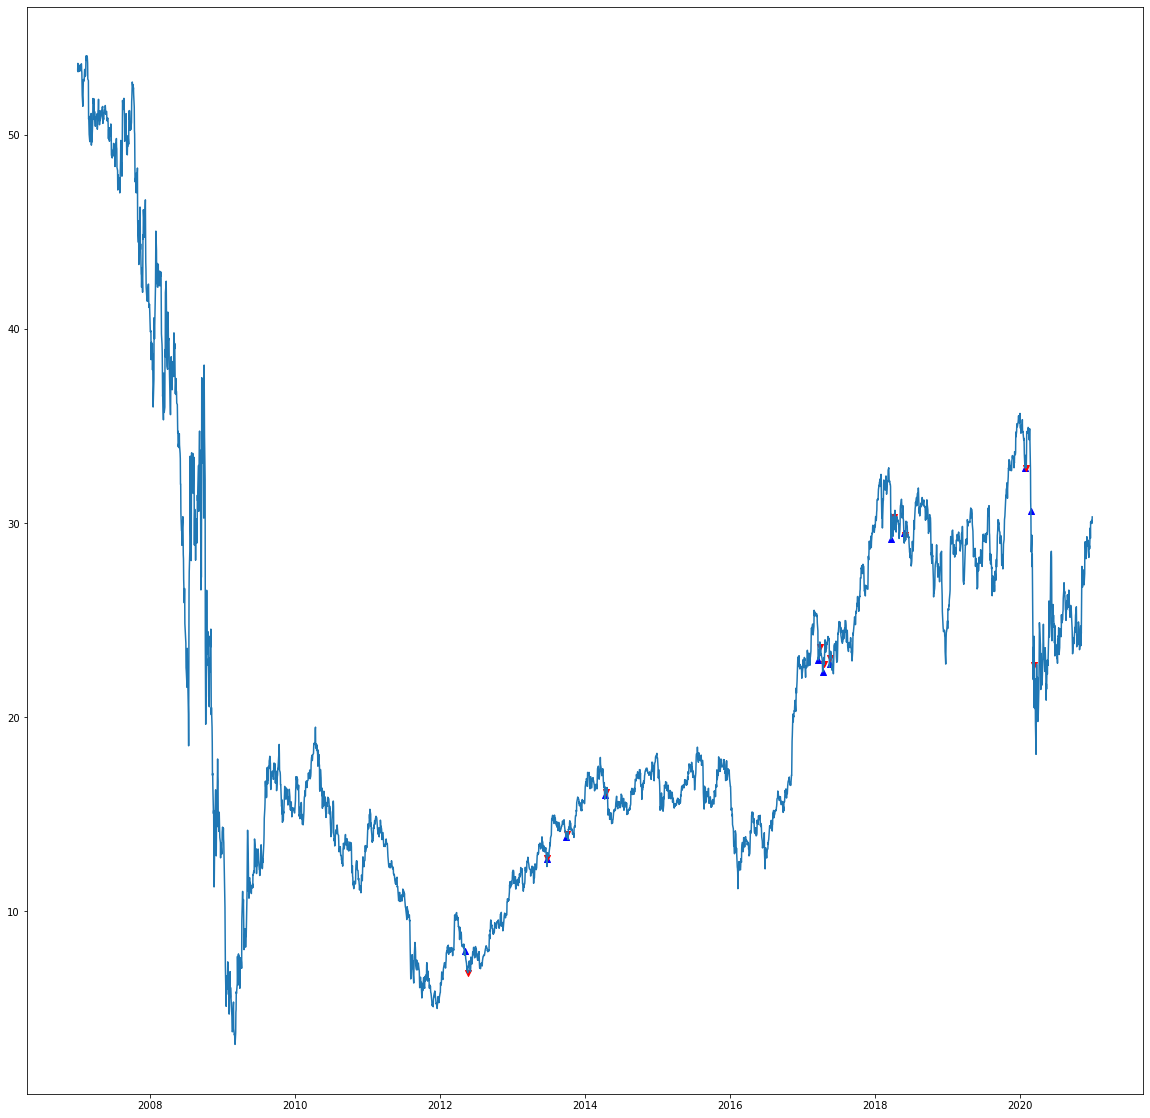

In [143]:
plt.figure(figsize=(20,20))
plt.scatter(df.loc[Summary_data['Buying_dates']].index, 
            df.loc[Summary_data['Buying_dates']]['Close'], 
            marker='^', 
            c='b')

plt.scatter(df.loc[Summary_data['Selling_dates']].index, 
            df.loc[Summary_data['Selling_dates']]['Close'], 
            marker='v', 
            c='r')

plt.plot(df['Close'])

